In [1]:
import os
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import spacy
from spacy import displacy
from top2vec import Top2Vec
from wordcloud import WordCloud, STOPWORDS

from config import Config
from preprocessing.sentiment_analysis import get_sentiment, get_token_sentiment

In [2]:
corpus = []
risk_file_names = glob.glob(os.path.join(Config.risk_dir(), '10k20f_5', '*.txt'))
for risk_file_name in tqdm(risk_file_names):
    with open(risk_file_name, 'r', encoding='utf-8') as risk_file:
        #import pdb; pdb.set_trace()
        docu = risk_file.read()
        if len(word_tokenize(docu)) > 100:
            corpus.append(docu)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3096/3096 [04:33<00:00, 11.31it/s]


In [3]:
print(f'Out of {len(risk_file_names)}, {len(corpus)} had valid text.')

Out of 3096, 1953 had valid text.


## The below Top2Vec model has been trained on 1953 files, ie a very small portion of the actual corpus. The result of topic modelling on this small corpus is that documents have been clustered into different industries.
## Top2Vec has various benefits over traditional topic modelling techniques-
* No need to specify number of topics
* No stop word lists required.
* No need for stemming/lemmatization.
* Works on short text.
* Creates jointly embedded topic, document, and word vectors.
* Has search functions built in.

In [17]:
model = Top2Vec.load('top2vec_model_deep')

In [18]:
print(f'Number of topics: {model.get_num_topics()}')

Number of topics: 31


In [4]:
model.get_topics()

(array([['frontier', 'councils', 'quad', ..., 'unions', 'aviation',
         'multiemployer'],
        ['unitholders', 'partnership', 'contentsindex', ...,
         'compression', 'mined', 'methane'],
        ['solutions', 'saas', 'software', ..., 'attention', 'memberships',
         'customers'],
        ...,
        ['aircraft', 'airline', 'lessees', ..., 'jet', 'shipping',
         'reorganizations'],
        ['loan', 'loans', 'noninterest', ..., 'inadequately', 'governors',
         'mortgage'],
        ['hotels', 'hotel', 'lodging', ..., 'franchising', 'improvements',
         'underinsured']], dtype='<U15'),
 array([[0.35758835, 0.35078293, 0.34462705, ..., 0.25954553, 0.25869513,
         0.2583104 ],
        [0.6173268 , 0.5460856 , 0.5297511 , ..., 0.3210952 , 0.3185597 ,
         0.3178021 ],
        [0.6808616 , 0.5496794 , 0.54155946, ..., 0.2784946 , 0.27594453,
         0.27460632],
        ...,
        [0.7766695 , 0.680389  , 0.6693871 , ..., 0.28494453, 0.28412613,
   

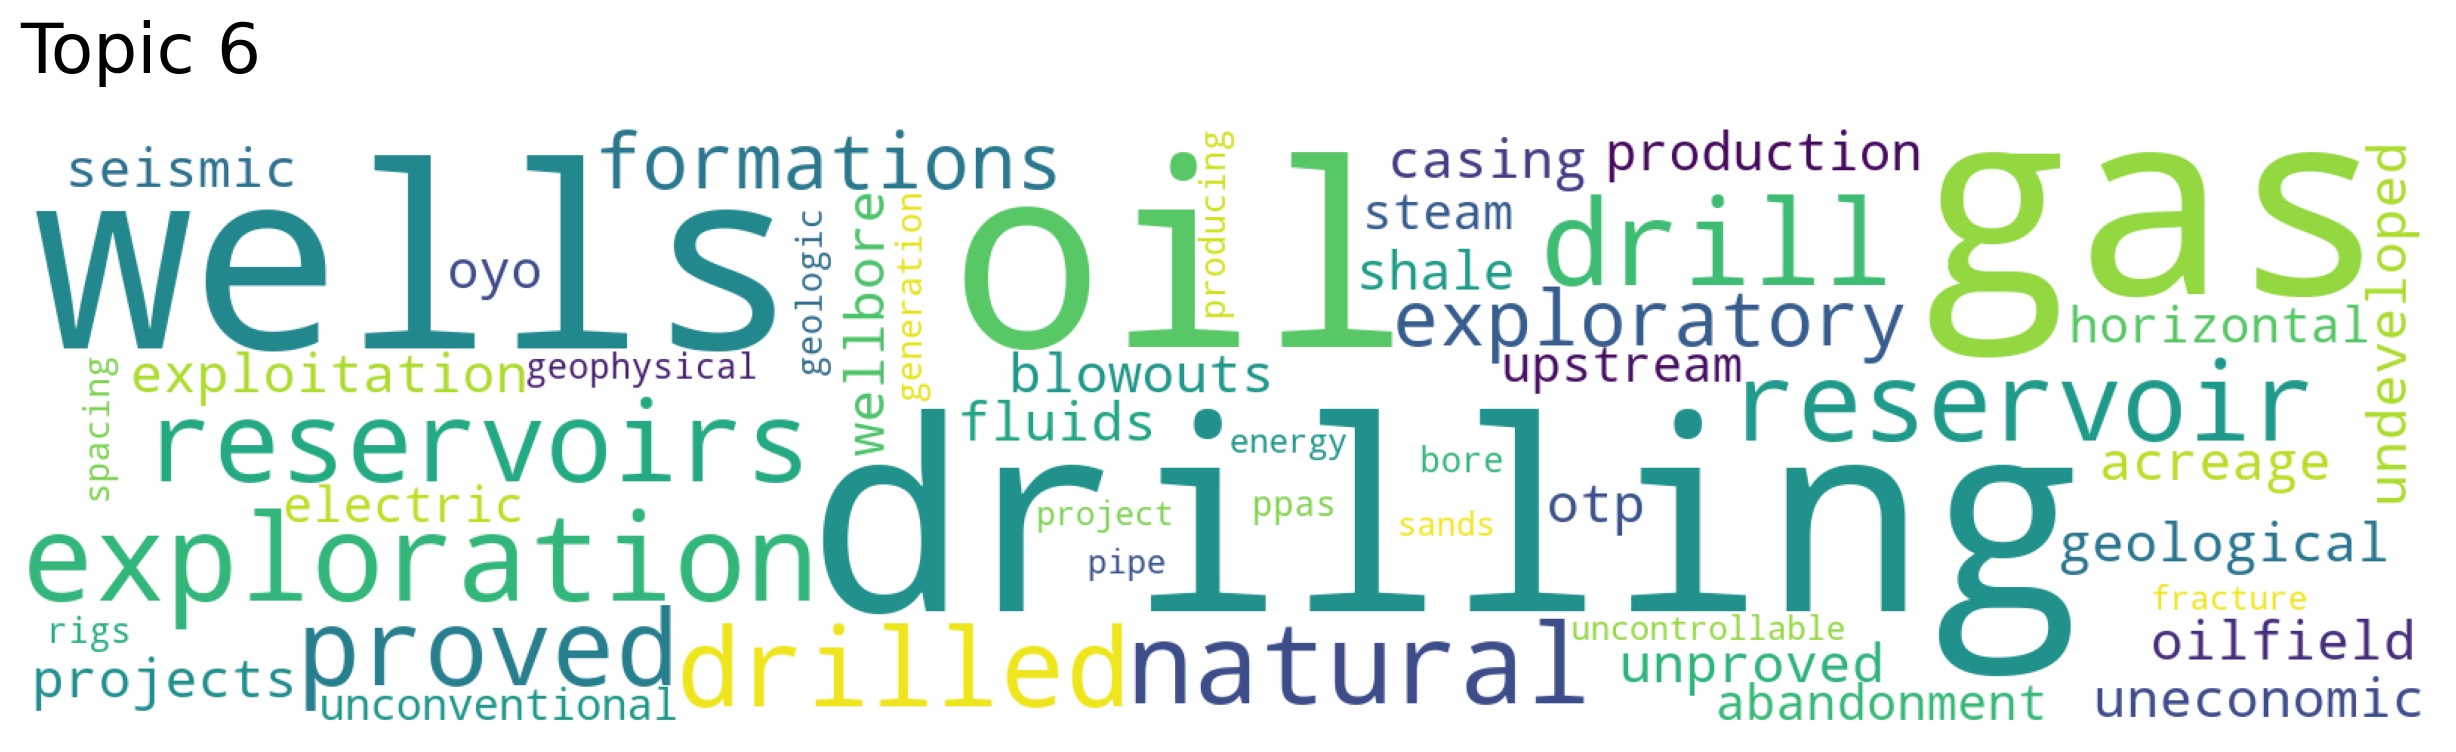

In [7]:
model.generate_topic_wordcloud(topic_num=6, background_color='white')

In [23]:
model.search_documents_by_topic(topic_num=6, num_docs=1000)

ValueError: Invalid number of documents: original topic 6 only has 90 documents.

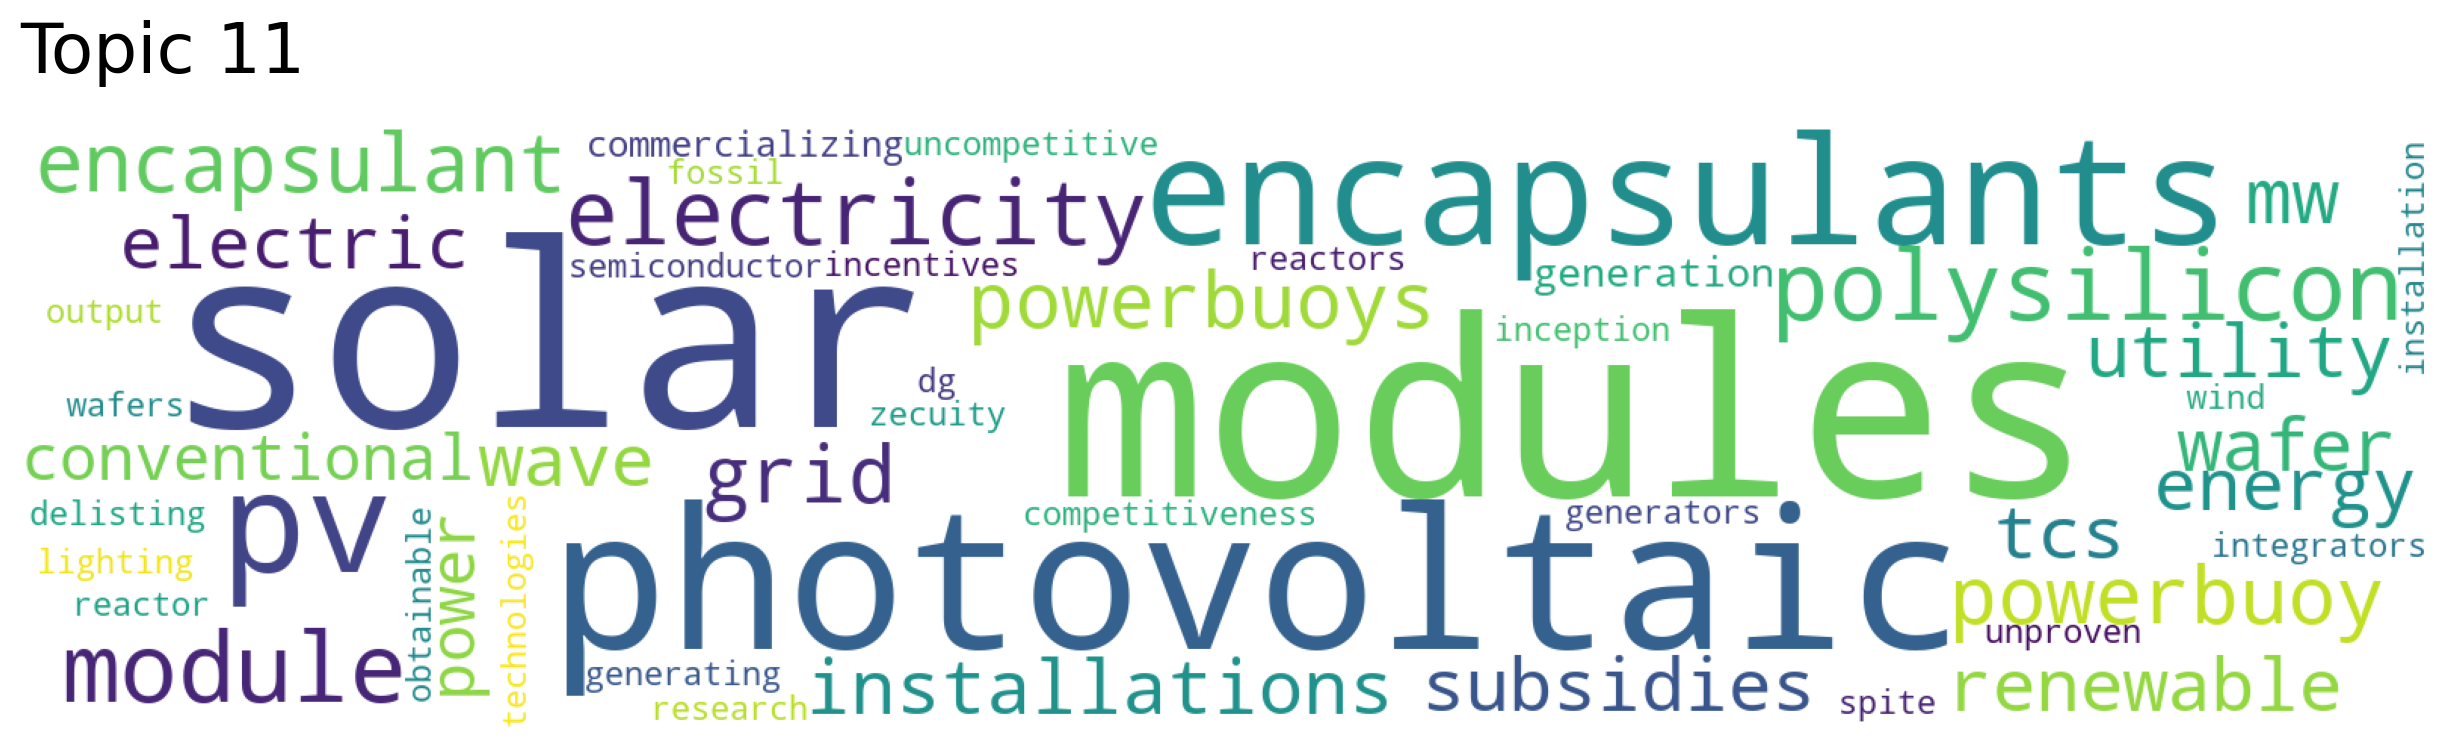

In [9]:
model.generate_topic_wordcloud(topic_num=11, background_color='white')

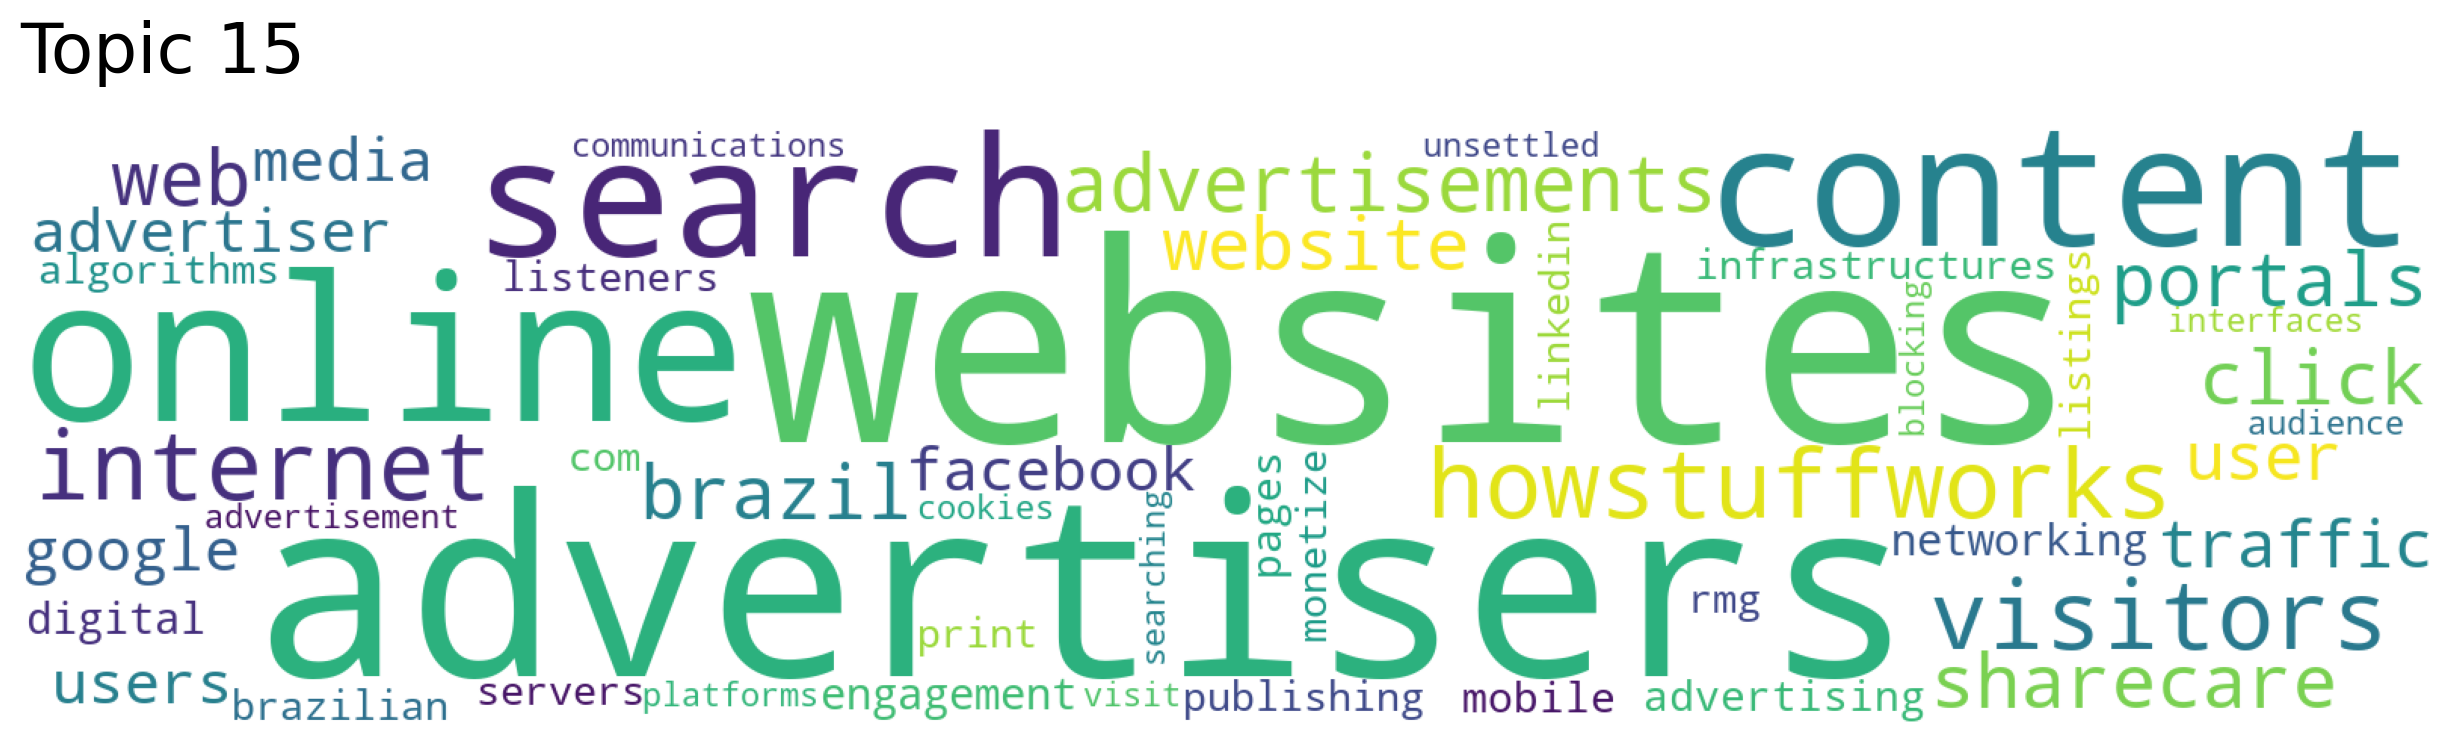

In [20]:
model.generate_topic_wordcloud(topic_num=15, background_color='white')

In [10]:
model.search_documents_by_topic(11, 1)

(array(["Risk FactorsThere are numerous and varied risks, known and unknown, that may prevent us from achieving our goals. If any of these risks actually occur, our business, prospects, financial condition or results of operation may be materially adversely affected. In such case, the trading price of our common stock could decline and investors could lose all or part of their investment.Risks Related to our BusinessWe have a limited operating history upon which an evaluation of our prospects can be made. We may never achieve profitability.Our operating subsidiary, Magnolia Solar, wasorganized on January 8, 2008, and has had only limited operations since our inception upon which to evaluate our business prospects. As a result, investors do not have access to the same type of information in assessing their proposed investment as would be available to purchasers in a company with a history of prior operations. Although the technology for solar cells we are commercializing has been develo

In [22]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=['debt', 'oil', 'gas', 'drill'], num_docs=1)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f'Document: {doc_id}, Score: {score}')
    print('-----------')
    print(doc)
    print('-----------')
    print()

Document: 100, Score: 0.6672
-----------
You should carefully consider the following risks and all of the information contained in this Report. Our
business, financial condition, and results of operations could be materially and adversely affected by any of these risks. The risks described below are not the only ones facing us. Additional risks
not presently known to us or which we consider immaterial also may adversely affect us.Our business is difficult to evaluate because we have a limited operating history.Athlon Energy Inc. was formed in April 2013 and became the majority owner of Athlon Holdings LP and its subsidiaries,
which began operating our first properties after acquiring them in January 2011. As a result, there is only limited historical financial and operating information available upon which to base your
evaluation of our performance.Drilling for and producing oil and natural gas are high-risk activities with many uncertainties that may result in a total loss of investme

In [13]:
model.search_topics(keywords=['debt', 'solar'], num_topics=2)

([array(['solar', 'modules', 'photovoltaic', 'encapsulants', 'pv',
         'polysilicon', 'module', 'electricity', 'encapsulant', 'powerbuoy',
         'grid', 'powerbuoys', 'mw', 'installations', 'wafer', 'tcs',
         'subsidies', 'renewable', 'wave', 'utility', 'energy', 'electric',
         'conventional', 'power', 'generation', 'commercializing',
         'competitiveness', 'uncompetitive', 'incentives', 'wind',
         'lighting', 'output', 'wafers', 'dg', 'integrators',
         'semiconductor', 'research', 'reactors', 'unproven',
         'technologies', 'delisting', 'fossil', 'installation',
         'generating', 'inception', 'generators', 'reactor', 'spite',
         'zecuity', 'obtainable'], dtype='<U15'),
  array(['bdc', 'portfolio', 'adviser', 'investments', 'bdcs', 'ric', 'mc',
         'stellus', 'gc', 'investment', 'rics', 'invest', 'asset', 'mcc',
         'objective', 'investing', 'whitehorse', 'debt', 'exemptive', 'gsv',
         'securities', 'value', 'companie

In [14]:
model.similar_words(keywords=['debt'], num_words=10)

(array(['indebtedness', 'financing', 'covenants', 'refinance', 'revolving',
        'credit', 'flow', 'secured', 'principal', 'default'], dtype='<U12'),
 array([0.7907, 0.6704, 0.651 , 0.641 , 0.638 , 0.6323, 0.6152, 0.6127,
        0.6101, 0.5997]))

In [4]:
topics, probs, topic_nums = model.get_topics()

In [9]:
model.similar_words(keywords=['cyber', 'security'], num_words=20)

(array(['breaches', 'attacks', 'attack', 'hackers', 'cybersecurity',
        'threats', 'unauthorized', 'confidential', 'malware', 'malicious',
        'computer', 'information', 'viruses', 'intrusions', 'systems',
        'compromise', 'unintentional', 'hacking', 'misuse',
        'sophistication'], dtype='<U14'),
 array([0.744 , 0.7248, 0.7246, 0.72  , 0.7094, 0.7005, 0.6988, 0.6974,
        0.6888, 0.6879, 0.6743, 0.669 , 0.6639, 0.6426, 0.6224, 0.6209,
        0.5977, 0.5947, 0.5778, 0.5727]))

In [26]:
model.get_topics(reduced=True)

(array([['councils', 'aircraft', 'automotive', ..., 'zinc', 'wood',
         'results'],
        ['unitholders', 'partnership', 'contentsindex', ..., 'kmp',
         'fuels', 'extraction'],
        ['reit', 'bpg', 'rmbs', ..., 'company', 'refinancings', 'zoning'],
        ...,
        ['satellite', 'programming', 'directv', ..., 'launch', 'debris',
         'station'],
        ['dialysis', 'medical', 'vitas', ..., 'icd', 'filtration',
         'bovine'],
        ['funds', 'kkr', 'carlyle', ..., 'partnership', 'alignment',
         'ubti']], dtype='<U15'),
 array([[0.34576917, 0.34518817, 0.34422296, ..., 0.26338264, 0.26319852,
         0.26292118],
        [0.66705924, 0.57942486, 0.5374742 , ..., 0.3174501 , 0.31723452,
         0.31544855],
        [0.5499804 , 0.51568854, 0.49008232, ..., 0.30425993, 0.30362174,
         0.30214328],
        ...,
        [0.7418274 , 0.6936045 , 0.6474004 , ..., 0.36430496, 0.36214015,
         0.3613372 ],
        [0.5066342 , 0.49151194, 0.482558

# Questions:
* What are you looking to get out of the model? Should these risks be represented by words or would you prefer to get an example of where it occurs in a document as evidence?
* Will it be possible to get a list mapping **companies**/**SIDs** to industries?
* Get a list of existing risks to identify emerging risks? Zygi used such a list. Is it *classified*/*grouped* over *years (or any such time period)* or by *industry*?

In [10]:
get_token_sentiment(topics[5])

{'Positive': array(['collaborators', 'collaborations', 'collaborative', 'collaborator',
        'collaboration'], dtype='<U15'),
 'Negative': array(['efficacy'], dtype='<U15'),
 'Polarity': 0.6666665555555741,
 'Subjectivity': 0.11999999760000006}

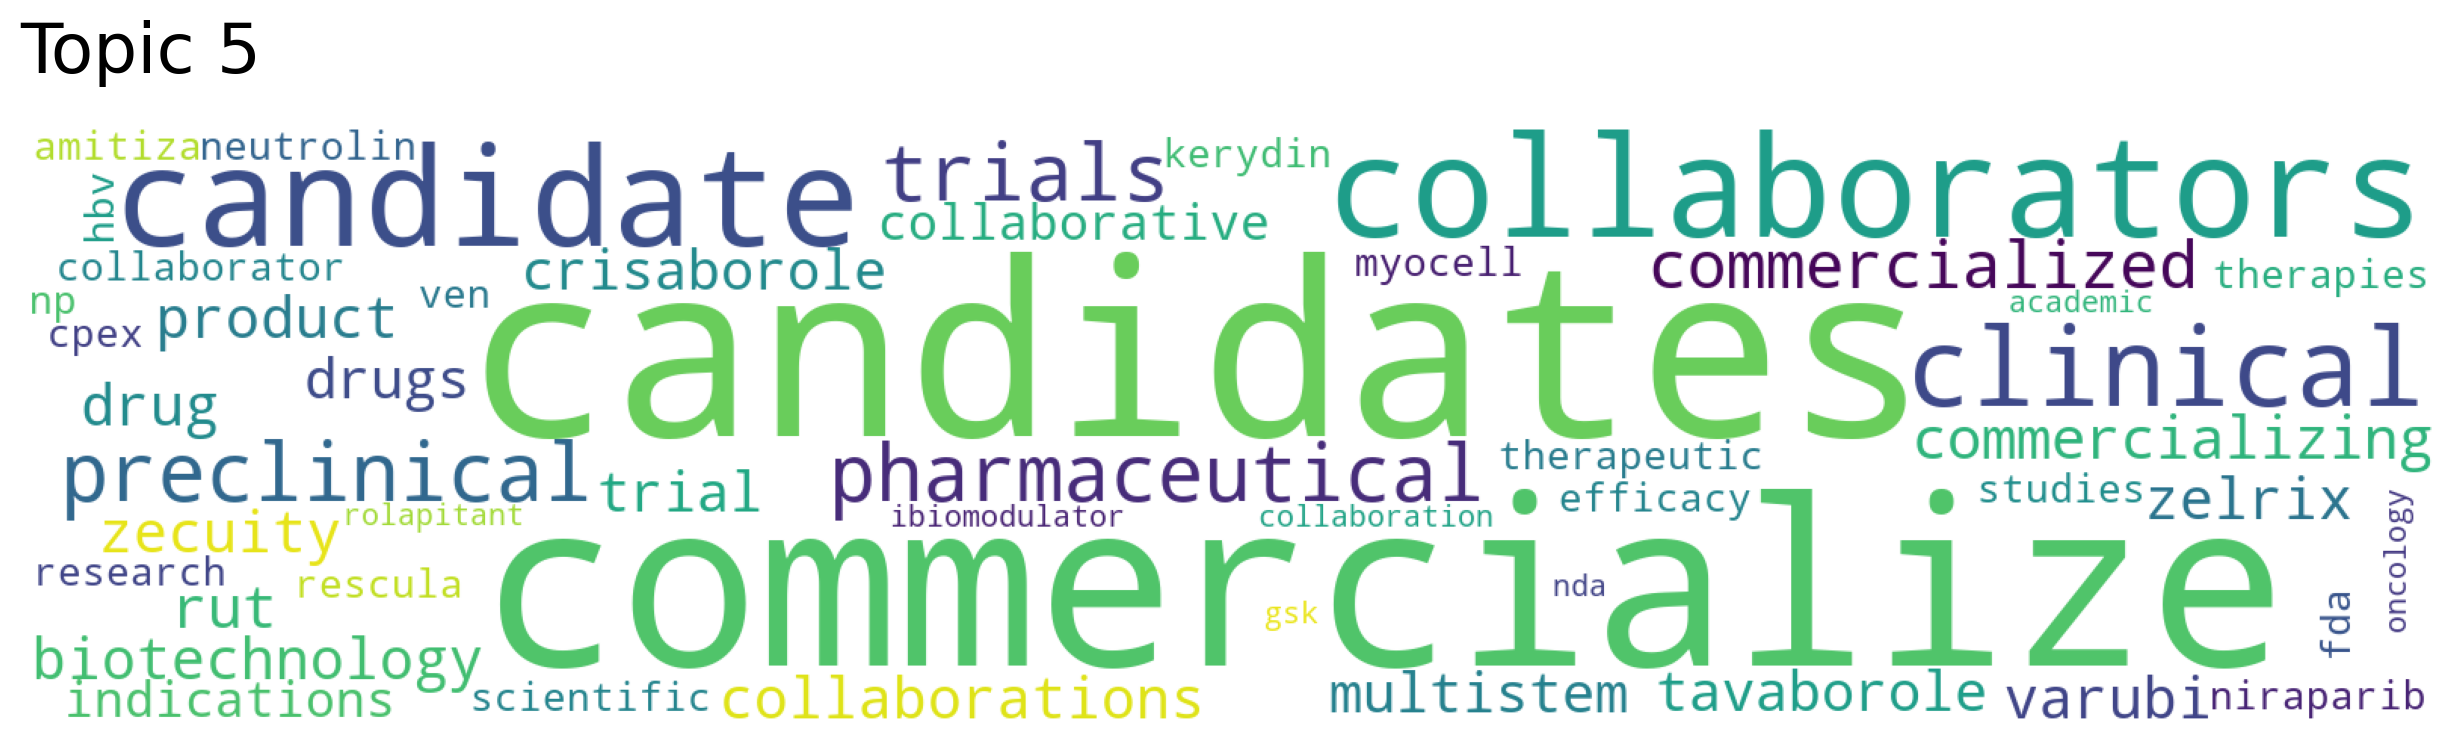

In [11]:
model.generate_topic_wordcloud(5, background_color='white')